In [27]:
# 한글 폰트 사용을 위한 라이브러리입니다.
!apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 55 not upgraded.


In [29]:
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

In [8]:
train_path = '../data/train.csv'
dt_train = pd.read_csv(train_path)

In [9]:
dt_train.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일', 'target'],
      dtype='object')

In [16]:
dt_train = dt_train.rename(columns={'전용면적(㎡)':'전용면적'})

In [17]:
dt_train['구'] = dt_train['시군구'].map(lambda x : x.split()[1])
dt_train['동'] = dt_train['시군구'].map(lambda x : x.split()[2])


In [10]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.dates import DateFormatter

import warnings
warnings.filterwarnings('ignore')

# 계약년월로 구성되어 있는 컬럼을 연도와 월로 나눠 컬럼을 생성합니다.
dt_train["계약연도"] = dt_train["계약년월"].astype(str).str[:4]  # 첫 4글자는 연도
dt_train["계약월"] = dt_train["계약년월"].astype(str).str[4:]  # 나머지 글자는 월

# 계약월 컬럼을 1 -> 01, 2 -> 02 형태로 포맷을 변경합니다.
dt_train['계약일'] = dt_train['계약일'].apply(lambda x: f'{x:02d}')

# 계약 년월일(Y-m-d) 컬럼도 함께 생성해 줍시다.
dt_train["계약년월일"] = dt_train["계약년월"].astype(str) + dt_train["계약일"].astype(str)
dt_train['계약년월일'] = pd.to_datetime(dt_train['계약년월일'])

In [ ]:
# 샘플 1
down_trade_sample1 = dt_train[
    (dt_train["아파트명"] == "염리삼성래미안")
    & (dt_train["계약연도"] >= "2000")
    & (dt_train["전용면적(㎡)"] == 84.96)
]

# 샘플 2
down_trade_sample2 = dt_train[
    (dt_train["아파트명"] == "헬리오시티")
    & (dt_train["계약연도"] >= "2000")
    & (dt_train["전용면적(㎡)"] >= 84)
    & (dt_train["전용면적(㎡)"] <= 90)
    ]

# 샘플 3
down_trade_sample3 = dt_train[
    (dt_train["아파트명"] == "현대14차")
    & (dt_train["계약연도"] >= "2000")
    & (dt_train["전용면적(㎡)"] >= 84)
    & (dt_train["전용면적(㎡)"] <= 90)
    ]

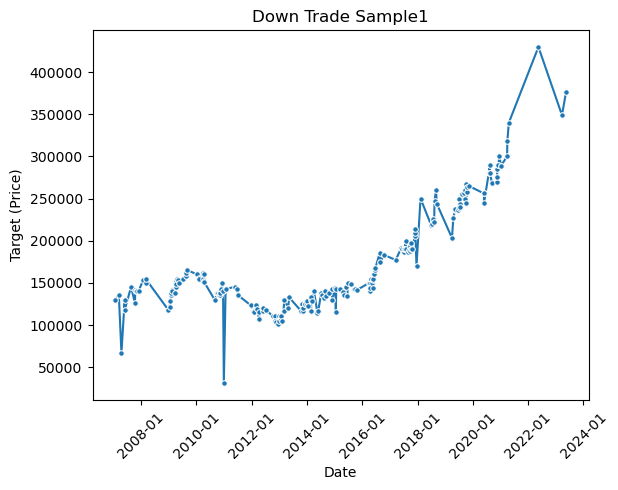

In [15]:
# 라인 차트 생성
sns.lineplot(x='계약년월일', y='target', data=down_trade_sample3, marker='o', markersize=4)

plt.title("Down Trade Sample1")
plt.xlabel('Date')
plt.ylabel('Target (Price)')

date_formatter = DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_formatter)

plt.xticks(rotation=45)

plt.show()

In [18]:
# 연도 + 지역 + 면적별 그룹화하여 통계 계산
group_stats = dt_train.groupby(['계약연도', '구', '전용면적']).agg(
    평균가격=('target', 'mean'),
    표준편차=('target', 'std')
).reset_index()



In [19]:
group_stats

,계약연도,구,전용면적,평균가격,표준편차
0,2007,강남구,16.78,10516.666667,938.527215
1,2007,강남구,17.13,9500.000000,NaN
2,2007,강남구,17.23,9300.000000,NaN
3,2007,강남구,22.12,11500.000000,500.000000
4,2007,강남구,23.34,11600.000000,1216.552506
...,...,...,...,...,...
169389,2023,중랑구,134.87,149500.000000,NaN
169390,2023,중랑구,134.94,81000.000000,NaN
169391,2023,중랑구,150.16,138000.000000,NaN
169392,2023,중랑구,157.85,149000.000000,NaN


In [20]:
# 그룹별 데이터 개수 확인
group_counts = dt_train.groupby(['계약연도', '구', '전용면적']).size().reset_index(name='데이터개수')
print(group_counts)


        계약연도    구    전용면적  데이터개수
0       2007  강남구   16.78      3
1       2007  강남구   17.13      1
2       2007  강남구   17.23      1
3       2007  강남구   22.12      3
4       2007  강남구   23.34      3
...      ...  ...     ...    ...
169389  2023  중랑구  134.87      1
169390  2023  중랑구  134.94      1
169391  2023  중랑구  150.16      1
169392  2023  중랑구  157.85      1
169393  2023  중랑구  203.77      1

[169394 rows x 4 columns]


In [ ]:
# 데이터에 통계 추가
data = dt_train.merge(group_stats, on=['계약연도', '구', '평형'])
data['z_score'] = (data['target'] - data['평균가격']) / data['표준편차']
data['is_outlier'] = data['z_score'].abs() > 3


### 데이터 시각화

1. 연도별 거래량과 평균 가격

- 2007~2008 (하락장) 글로벌 금융위기 전후, 거래량 감소 및 가격 하락 시작	
- 2009~2011 (상승장) 저금리 및 정부의 부동산 규제 완화 정책, 소폭 가격 상승	
- 2012~2013 (하락장) 경제 불황 및 부동산 경기 침체, 거래량 감소	
- 2014~2018 (상승장) 초저금리 시대, 수도권 중심으로 매매가격과 거래량 증가	
- 2019~2021 (상승장) 코로나19 이후 유동성 증가, 전국적인 부동산 가격 폭등	
- 2022~2023 (하락장) 금리 급등, 거래량 급감, 일부 지역 가격 하락	

In [23]:
# 연도별 거래량과 평균 가격 계산
yearly_stats = dt_train.groupby('계약연도').agg(
    거래량=('target', 'size'),      # 거래량 (데이터 개수)
    평균가격=('target', 'mean')    # 평균 가격
).reset_index()

# 결과 확인
print(yearly_stats)


    계약연도     거래량           평균가격
0   2007   58767   31969.883574
1   2008   57012   39559.710447
2   2009   73491   50162.794165
3   2010   44457   49571.817532
4   2011   54513   45494.878488
5   2012   40851   44379.360554
6   2013   67865   44318.094953
7   2014   85130   45831.005509
8   2015  119891   47739.739964
9   2016   99253   53448.494413
10  2017  104893   61972.300582
11  2018   81413   65895.231486
12  2019   74696   82215.074716
13  2020   83711   84962.562901
14  2021   43117  103053.294826
15  2022   12214  100060.129278
16  2023   17548  105019.238660


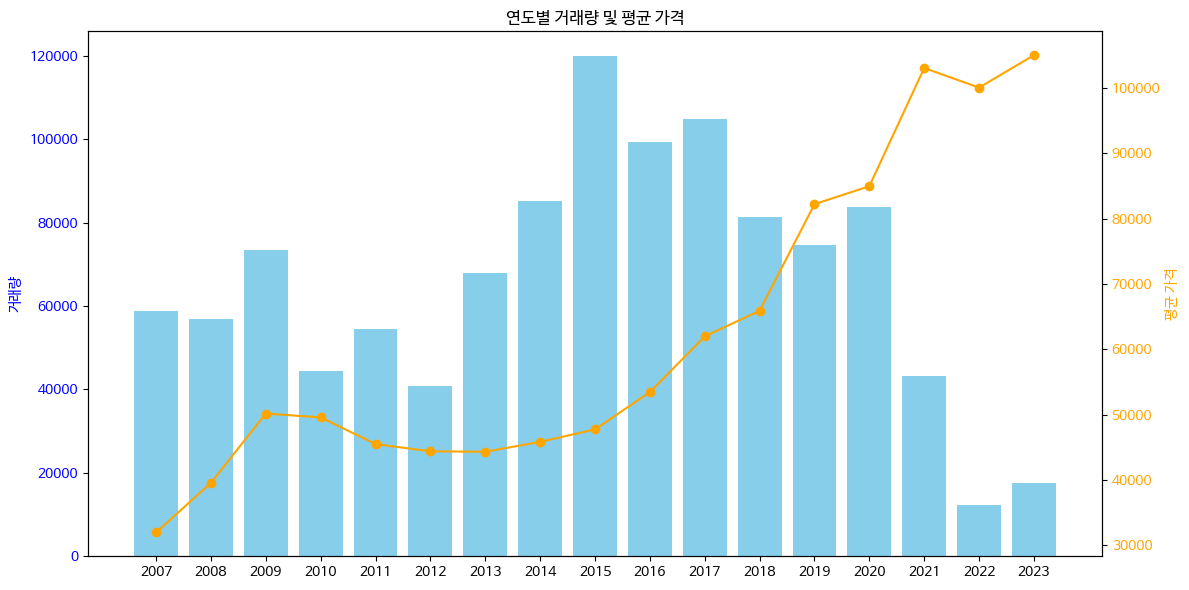

In [30]:
# 연도별 거래량과 평균 가격 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 거래량 막대 그래프
ax1.bar(yearly_stats['계약연도'], yearly_stats['거래량'], color='skyblue', label='거래량')
ax1.set_ylabel('거래량', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 평균 가격 선 그래프 (2번째 축)
ax2 = ax1.twinx()
ax2.plot(yearly_stats['계약연도'], yearly_stats['평균가격'], color='orange', marker='o', label='평균 가격')
ax2.set_ylabel('평균 가격', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 제목 및 레이아웃
plt.title('연도별 거래량 및 평균 가격')
fig.tight_layout()
plt.show()


2. 구별 거래량과 평균 가격

In [32]:
# 구별 거래량과 평균 가격 계산
gu_stats = dt_train.groupby('구').agg(
    거래량=('target', 'size'),     # 거래량 (데이터 개수)
    평균가격=('target', 'mean')    # 평균 가격
).reset_index()

# 결과 확인
print(gu_stats)


       구     거래량           평균가격
0    강남구   69083  114847.461503
1    강동구   61895   54402.872801
2    강북구   21896   38316.975201
3    강서구   66610   44215.453701
4    관악구   35967   41954.133039
5    광진구   22070   67158.379293
6    구로구   57604   38605.012447
7    금천구   19586   33709.248647
8    노원구  115099   33870.444730
9    도봉구   52572   31924.613711
10  동대문구   39693   45194.761822
11   동작구   40507   60936.451058
12   마포구   40387   64445.226137
13  서대문구   32875   49082.573688
14   서초구   53126  113608.653390
15   성동구   39358   68924.389400
16   성북구   56675   45117.779038
17   송파구   73785   83868.032920
18   양천구   53977   59042.132927
19  영등포구   47640   56137.342464
20   용산구   20551  105876.961900
21   은평구   38283   43721.691848
22   종로구    9101   57674.032963
23    중구   13388   62084.985733
24   중랑구   37094   35195.762819


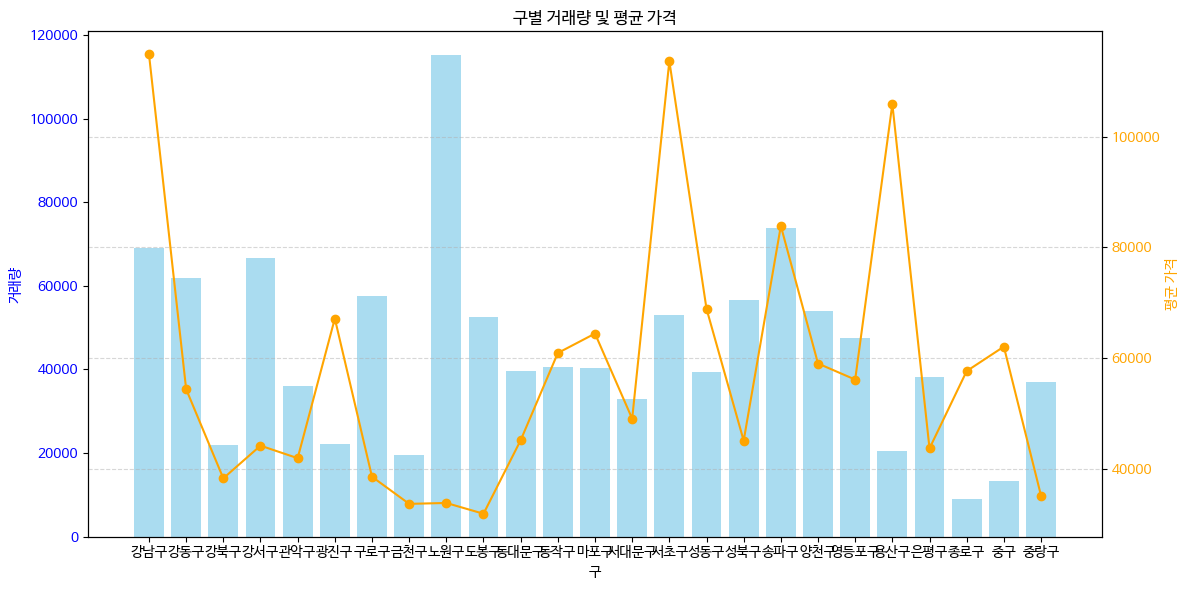

In [49]:
# 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 축: 거래량 (막대 그래프)
ax1.bar(gu_stats['구'], gu_stats['거래량'], color='skyblue', alpha=0.7, label='거래량')
ax1.set_ylabel('거래량', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('구')

# 두 번째 축: 평균 가격 (선 그래프)
ax2 = ax1.twinx()
ax2.plot(gu_stats['구'], gu_stats['평균가격'], color='orange', marker='o', label='평균 가격')
ax2.set_ylabel('평균 가격', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# X축 레이블 회전, 여백, 글자 크기 설정
plt.xticks(rotation=90, fontsize=4)  # X축 레이블 회전 및 글자 크기 조정
plt.subplots_adjust(bottom=0.4)      # 하단 여백 조정

# 그래프 제목 및 레이아웃
plt.title('구별 거래량 및 평균 가격')
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [52]:
# 구별 연도별 거래량과 평균 가격 계산
gu_yearly_stats = dt_train.groupby(['구', '계약연도']).agg(
    거래량=('target', 'size'),      # 거래량
    평균가격=('target', 'mean')    # 평균 가격
).reset_index()

# 결과 확인
print(gu_yearly_stats)


       구  계약연도   거래량          평균가격
0    강남구  2007  2657  68492.480241
1    강남구  2008  2595  75410.997303
2    강남구  2009  6480  90125.680247
3    강남구  2010  3811  86790.432695
4    강남구  2011  3872  84603.758006
..   ...   ...   ...           ...
420  중랑구  2019  2286  45113.670166
421  중랑구  2020  2869  51208.368770
422  중랑구  2021  1649  64506.822317
423  중랑구  2022   481  50473.908524
424  중랑구  2023   459  56865.823529

[425 rows x 4 columns]


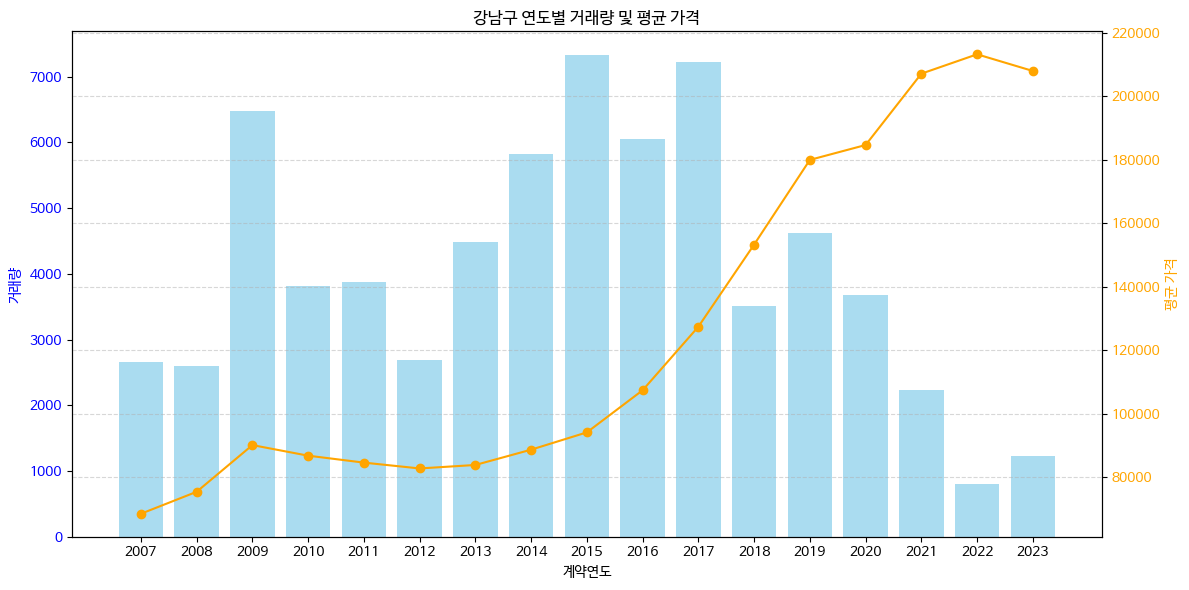

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# 특정 구 선택 (예: 강남구)
selected_gu = '강남구'
gu_data = gu_yearly_stats[gu_yearly_stats['구'] == selected_gu]

# 거래량과 평균 가격 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 첫 번째 축: 거래량 (막대 그래프)
ax1.bar(gu_data['계약연도'], gu_data['거래량'], color='skyblue', alpha=0.7, label='거래량')
ax1.set_ylabel('거래량', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('계약연도')

# 두 번째 축: 평균 가격 (선 그래프)
ax2 = ax1.twinx()
ax2.plot(gu_data['계약연도'], gu_data['평균가격'], color='orange', marker='o', label='평균 가격')
ax2.set_ylabel('평균 가격', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 그래프 제목 및 레이아웃
plt.title(f'{selected_gu} 연도별 거래량 및 평균 가격')
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


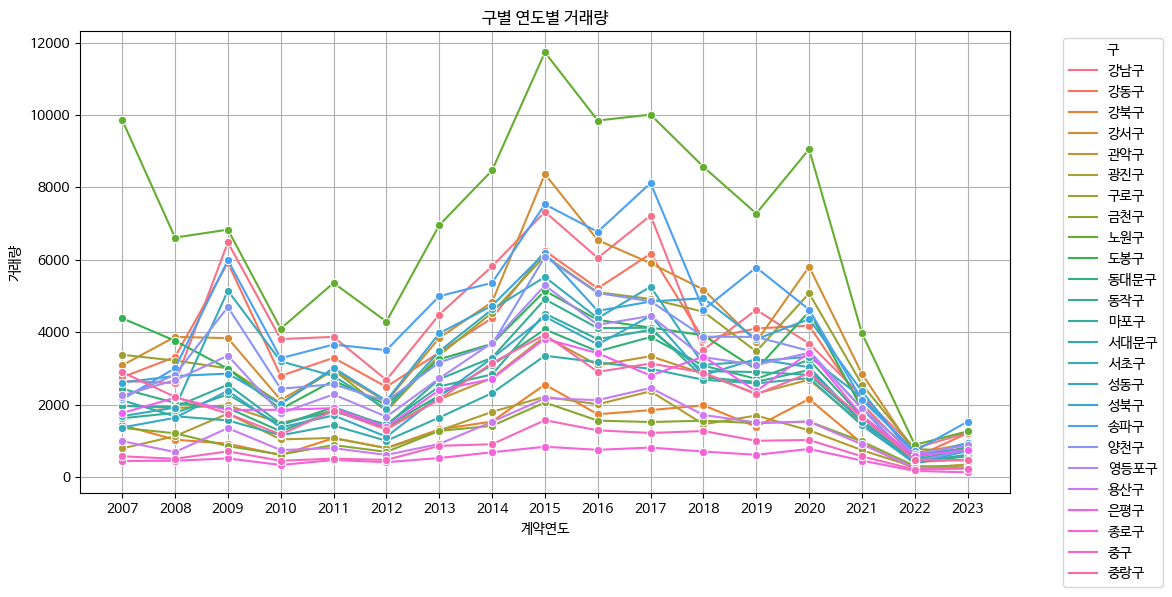

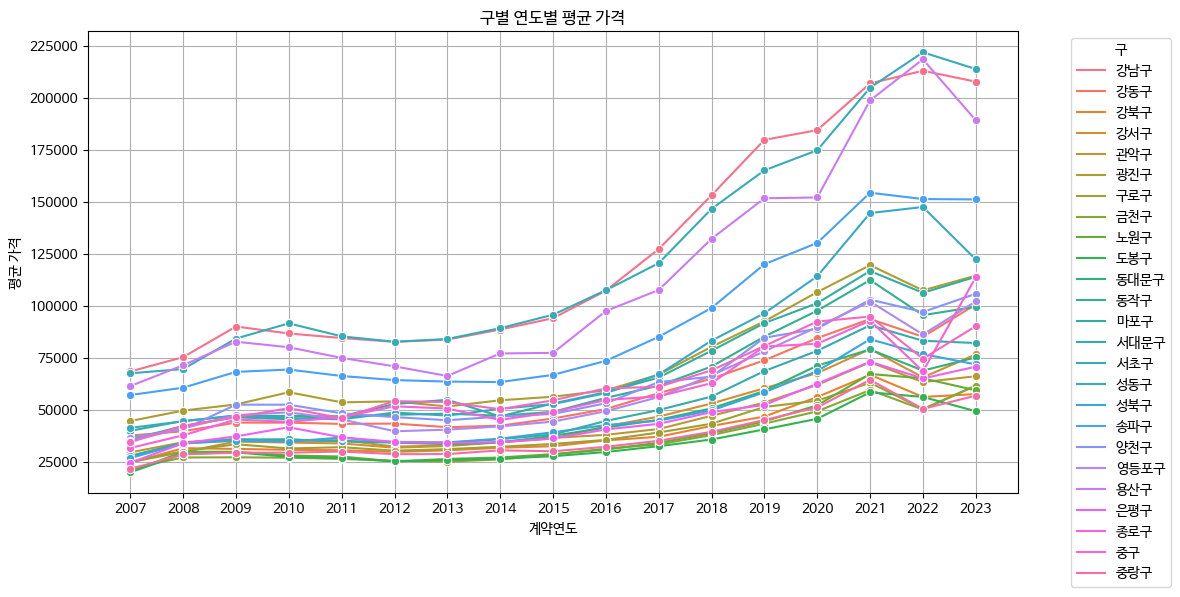

In [55]:
# 연도별 거래량과 평균 가격 시각화 (여러 구)
plt.figure(figsize=(12, 6))

# 거래량 라인 플롯
sns.lineplot(data=gu_yearly_stats, x='계약연도', y='거래량', hue='구', marker='o')
plt.title('구별 연도별 거래량')
plt.xlabel('계약연도')
plt.ylabel('거래량')
plt.legend(title='구', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# 평균 가격 라인 플롯
plt.figure(figsize=(12, 6))
sns.lineplot(data=gu_yearly_stats, x='계약연도', y='평균가격', hue='구', marker='o')
plt.title('구별 연도별 평균 가격')
plt.xlabel('계약연도')
plt.ylabel('평균 가격')
plt.legend(title='구', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
###### 아래코드는 그냥 참고용 삭제해도 됨!!

In [ ]:
sample3 = dt_train[(dt_train["계약년"] >= "2023") & (dt_train["전용면적"] >= 84) & (dt_train["target"] <= 13000)]
sample3

In [ ]:
sns.lineplot(x='계약년월', y='target', data=sample1, marker='o', markersize=4)

plt.title("Sample")
plt.xlabel('Date')
plt.ylabel('Target (Price)')

date_formatter = DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_formatter)

plt.xticks(rotation=45)

plt.show()

In [ ]:
dobonggu_data = dt_train[(dt_train["구"] == "도봉구") & (dt_train["전용면적"] >= 84) & (dt_train["계약년"] >= "2020")]

# 계약년별 평균 target 계산
average_price_by_year = dobonggu_data.groupby(["계약년", "전용면적"])["target"].mean().reset_index()

# 결과 출력
print(average_price_by_year)
